<h1><center><font size=12>H1B Data Mining Project</font></center></h1>

# __1. INTRODUCTION__

<font size=5>The H-1B is a visa in the United States under the Immigration and Nationality Act, section 101(a)(15)(H) which allows U.S. employers to employ foreign workers in specialty occupations.</font>

# __2. MOTIVATION AND GOAL__

<font size=5>i) a helper in university application process</font>
<br>
<br>
<font size=5>ii) a database to go to during job hunting</font>
<br>
<br>
<font size=5>iii) is H1B a lottery ? </font>

# __3. DATA EXPLORARY__

In [4]:
import os
os.chdir("D:\stackoverflow data\h-1b-visa")

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import base
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [5]:
data = pd.read_csv('h1b_kaggle.csv')
data.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


<font size=5>Let us have a look at the salary information of the H1B application cases

In [93]:
salaryCol = data.PREVAILING_WAGE
print("the 98 percentile of the salary is %.1fk dollar"%(np.nanpercentile(salaryCol,98)/1000.0))
print("the 2 percentile of the salary is %.1fk dollar"%(np.nanpercentile(salaryCol,2)/1000.0))
print("the median of the salary is %.1fk dollar"%(salaryCol.median()/1000.0))

the 98 percentile of the salary is 121.9k dollar
the 2 percentile of the salary is 37.7k dollar
the median of the salary is 65.0k dollar


<font size=5>Exclude the outliers and plot the histogram of the salary distribution</font>
<br>
<font size=5>And perform some data visulization of the salary

Text(0,0.5,'Number of Applications')

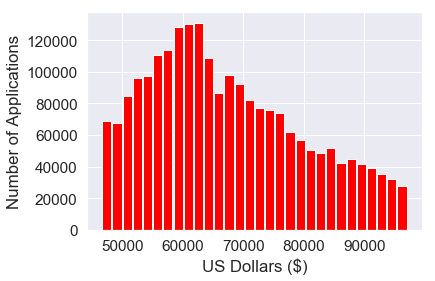

In [98]:
salaryCol[salaryCol <= np.nanpercentile(salaryCol,2)]= np.nan
salaryCol[salaryCol >= np.nanpercentile(salaryCol,98)]= np.nan
salaryCol.dropna()
plt.hist(salaryCol, 30, range=[np.nanpercentile(salaryCol,2), np.nanpercentile(salaryCol,98)], \
                               rwidth = 0.9, histtype = 'bar', facecolor = 'red', align = 'mid');
plt.xlabel('US Dollars ($)')
plt.ylabel('Number of Applications')

<font size=5>From the wages histgram, the most common salary for H1B application cases are 60k dollars, there is a long tail of 
distribution as observed. We can have a closer look at the salary distribution per year as shown in the violine plot to gain more information about the correlation between the salary and the year.

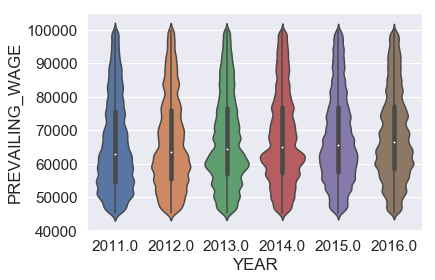

In [99]:
ax = sns.violinplot(x="YEAR", y="PREVAILING_WAGE", data = data)

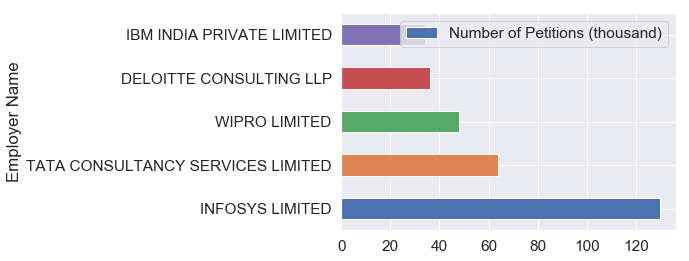

In [101]:
employer_name = data['EMPLOYER_NAME'].value_counts().index.tolist();
employer_petitions = data['EMPLOYER_NAME'].value_counts().tolist();
employer_petitions_thousand = [x / 1000 for x in employer_petitions];
pd.DataFrame({'Employer Name':employer_name[:5], \
              'Number of Petitions (thousand)':employer_petitions_thousand[:5]})\
             .plot.barh(x = 'Employer Name', y ='Number of Petitions (thousand)', rot = 0)

In [103]:
df_top5_worksite = data.groupby(['WORKSITE'], sort=False).size().nlargest(5).reset_index(name='TOP5')
df_top5_worksite

,WORKSITE,TOP5
0,"NEW YORK, NEW YORK",191719
1,"HOUSTON, TEXAS",83889
2,"SAN FRANCISCO, CALIFORNIA",62787
3,"ATLANTA, GEORGIA",52193
4,"CHICAGO, ILLINOIS",51497


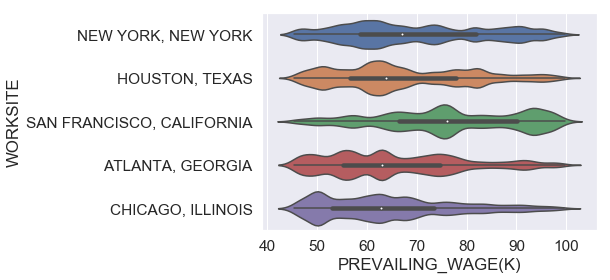

In [111]:
i = 0
df_temp = df_top5_worksite
for worksite in df_temp['WORKSITE']:
    if i == 0: df_temp = data[data['WORKSITE']==worksite]
    if i > 0: df_temp = pd.concat([df_temp,data[data['WORKSITE']==worksite]])
    i += 1
df_temp['PREVAILING_WAGE(K)'] = df_temp['PREVAILING_WAGE'] / 1000.0
ax_top5_worksite = sns.violinplot(x = "PREVAILING_WAGE(K)", y = "WORKSITE", data = df_temp)
#ax_top5_worksite.set_xticklabels(['50K','60K','70K','80K','90K','100K','110K'])

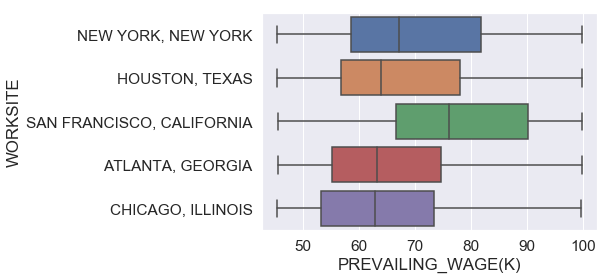

In [112]:
ax_top5_worksite_boxplot = sns.boxplot(x = "PREVAILING_WAGE(K)", y = "WORKSITE", data = df_temp)

In [116]:
df_top20_jobTitle = data.groupby(['JOB_TITLE'], sort=False).size().nlargest(20).reset_index(name='top20')
df_top20_jobTitle.head()

,JOB_TITLE,top20
0,PROGRAMMER ANALYST,249038
1,SOFTWARE ENGINEER,121307
2,COMPUTER PROGRAMMER,70570
3,SYSTEMS ANALYST,61965
4,SOFTWARE DEVELOPER,42907


In [118]:
i = 0
df_temp_jobs = df_top20_jobTitle
for job in df_temp_jobs['JOB_TITLE']:
    if i == 0: df_temp_jobs = data[data['JOB_TITLE'] == job]
    if i > 0: df_temp_jobs = pd.concat([df_temp_jobs, data[data['JOB_TITLE'] == job]])
    i += 1
    
df_temp_jobs['PREVAILING_WAGE(K)'] = df_temp_jobs['PREVAILING_WAGE']/1000.0

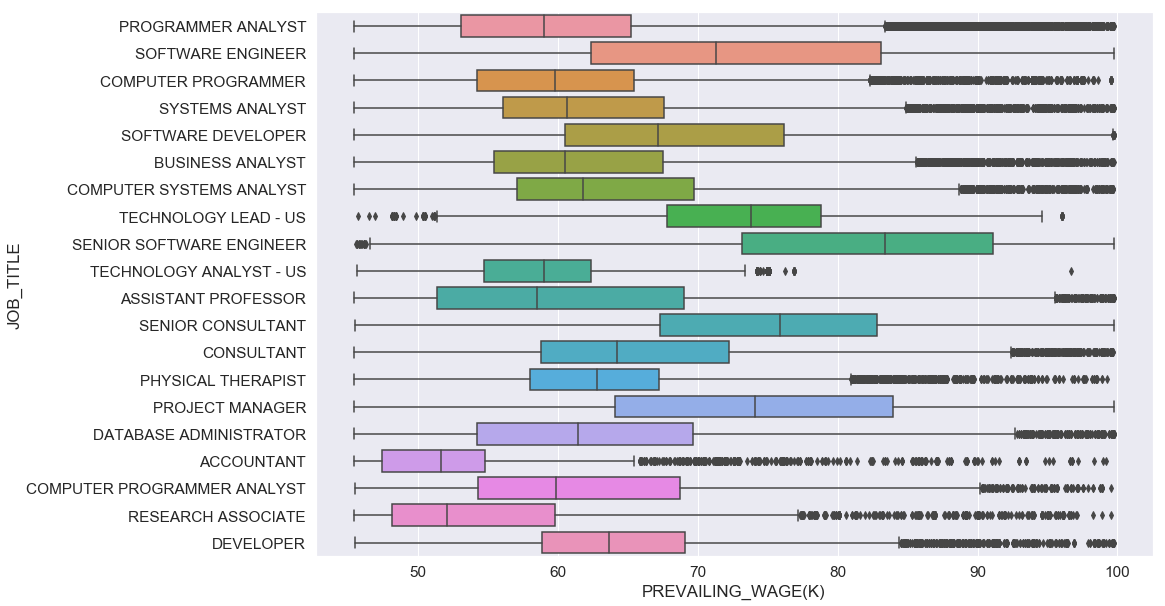

In [119]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize= a4_dims)
ax_top20_jobTitle_boxplot = sns.boxplot(x = "PREVAILING_WAGE(K)", y = "JOB_TITLE", data = df_temp_jobs, ax = ax)

In [134]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from ipywidgets import *
import requests

In [138]:
data_part = df_temp.sample(n = 1000)
def topNSalary(col= 'WORKSITE', topN = 5):
    df_temp = data_part.groupby([col], sort=False).size().nlargest(topN).reset_index(name='topN')
    i = 0
    for ele in df_temp[col]:
        if i == 0: df_temp = data_part[data_part[col] == ele]
        if i > 0: df_temp = pd.concat([df_temp, data_part[data_part[col] == ele]])
        i += 1
    a_dims = (15, 10)
    fig, ax = plt.subplots(figsize= a_dims) 
    ax.set_xlabel('Prevailing Wages', size = 20)
    ax.set_ylabel(col, size = 20)
    ax.tick_params(direction='out', length = 12, width = 4, colors='b',
                   grid_color='r', grid_alpha = 0.5, labelsize = 16)
    sns.violinplot(x = "PREVAILING_WAGE(K)", y = col, data = df_temp, ax = ax)

In [139]:
interact(topNSalary, col=['WORKSITE', 'JOB_TITLE', 'EMPLOYER_NAME', 'SOC_NAME'], topN = (0, 20))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnY29sJywgb3B0aW9ucz0oJ1dPUktTSVRFJywgJ0pPQl9USVRMRScsICdFTVBMT1lFUl9OQU1FJywgJ1NPQ19OQU3igKY=


<function __main__.topNSalary>

# __4.Machine Learning To Predict The OutCome of H1B Application__

<font size=5>There are seven types of outcome of a H1B visa application:</font>
<br>
<br>
<font size=5>Certifined-withdrawn, withdrawn, certified, denied, rejected,</font> 
<br>
<font size=5>invalidated, pending quality and compliance review</font>

In [81]:
data['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan], dtype=object)

In [82]:
df = data.copy()

<font size=5>Now divide the visa application result into two categories, certified and denied

In [8]:
warnings.filterwarnings("ignore")

df.CASE_STATUS[df['CASE_STATUS']=='WITHDRAWN'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

CERTIFIED    2818282
DENIED        184163
Name: CASE_STATUS, dtype: int64


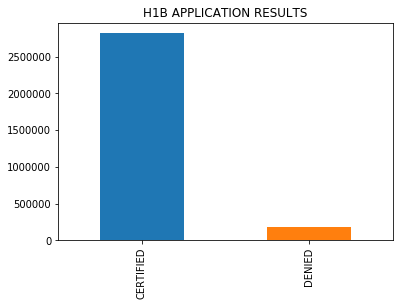

In [9]:
## Storing non null in df w.r.t. case status
df = df[df['CASE_STATUS'].notnull()]
print(df['CASE_STATUS'].value_counts())
df['CASE_STATUS'].value_counts().plot(kind='bar', title='H1B APPLICATION RESULTS')

Find out the number of NAN in the data and remove them

In [10]:
##check count of NAN
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

('the number of nan in each column is: ', Unnamed: 0                 0
CASE_STATUS                0
EMPLOYER_NAME             46
SOC_NAME               17721
JOB_TITLE                 30
FULL_TIME_POSITION         2
PREVAILING_WAGE           72
YEAR                       0
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64)


In [11]:
df = df[df['CASE_STATUS'].notnull()]
df = df[df['EMPLOYER_NAME'].notnull()]
df = df[df['SOC_NAME'].notnull()]
df = df[df['JOB_TITLE'].notnull()]
df = df[df['FULL_TIME_POSITION'].notnull()]
df = df[df['PREVAILING_WAGE'].notnull()]
# Dropping lat and lon columns
if 'lat' in df:
    df = df.drop('lat', axis = 1)
if 'lon' in df:
    df = df.drop('lon', axis = 1)
count_of_nan = len(df) - df.count()
print('the number of nan in each column is: ' , count_of_nan)

('the number of nan in each column is: ', Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64)


In [12]:
df['WHETHER_EMPLOYER_UNIVERSITY'] = np.nan

In [13]:
# to sepearte the data into academia job and not academia job
warnings.filterwarnings("ignore")
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('university')] = 'university'
df.WHETHER_EMPLOYER_UNIVERSITY[df['EMPLOYER_NAME'].str.contains('college')] = 'university'
df['WHETHER_EMPLOYER_UNIVERSITY'] = df['WHETHER_EMPLOYER_UNIVERSITY'].replace(np.nan, 'not a university', regex=True)

In [14]:
df['WHETHER_CS'] = np.nan

In [15]:
# to sepearte the data into CS job and not CS job
warnings.filterwarnings("ignore")
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df.WHETHER_CS[df['SOC_NAME'].str.contains('computer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('software')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('data')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('programmer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('developer')] = 'CS'
df.WHETHER_CS[df['SOC_NAME'].str.contains('web')] = 'CS'
df['WHETHER_CS'] = df['WHETHER_CS'].replace(np.nan, 'not a CS job')

In [16]:
## Splitting city and state and capturing state in another variable
df['state'] = df.WORKSITE.str.split(',').str[-1].str.lstrip()
df = df[df.state != 'NA']

In [17]:
df1 = df.copy()
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,1,CERTIFIED,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,not a CS job,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",chief executives,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",not a university,not a CS job,TEXAS
2,3,CERTIFIED,"ports america group, inc.",chief executives,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",not a university,not a CS job,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",chief executives,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",not a university,not a CS job,COLORADO
4,5,DENIED,peabody investments corp.,chief executives,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",not a university,not a CS job,MISSOURI


In [18]:
for col in ['CASE_STATUS', 'WHETHER_CS', 'FULL_TIME_POSITION', 'YEAR', 'WHETHER_EMPLOYER_UNIVERSITY', 'state']:
    df1[col] = df1[col].astype('category')

In [19]:
df1.WHETHER_EMPLOYER_UNIVERSITY.unique()
df1.dtypes

Unnamed: 0                        int64
CASE_STATUS                    category
EMPLOYER_NAME                    object
SOC_NAME                         object
JOB_TITLE                        object
FULL_TIME_POSITION             category
PREVAILING_WAGE                 float64
YEAR                           category
WORKSITE                         object
WHETHER_EMPLOYER_UNIVERSITY    category
WHETHER_CS                     category
state                          category
dtype: object

In [20]:
df1.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
0,1,CERTIFIED,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",university,not a CS job,MICHIGAN
1,2,CERTIFIED,"goodman networks, inc.",chief executives,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",not a university,not a CS job,TEXAS
2,3,CERTIFIED,"ports america group, inc.",chief executives,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",not a university,not a CS job,NEW JERSEY
3,4,CERTIFIED,"gates corporation, a wholly-owned subsidiary o...",chief executives,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",not a university,not a CS job,COLORADO
4,5,DENIED,peabody investments corp.,chief executives,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",not a university,not a CS job,MISSOURI


In [21]:
stateName = df1.state.unique()
stateName.sort_values

<bound method Categorical.sort_values of [MICHIGAN, TEXAS, NEW JERSEY, COLORADO, MISSOURI, ..., SOUTH DAKOTA, NORTH DAKOTA, ALABAMA, VERMONT, MONTANA]
Length: 52
Categories (52, object): [MICHIGAN, TEXAS, NEW JERSEY, COLORADO, ..., NORTH DAKOTA, ALABAMA, VERMONT, MONTANA]>

In [22]:
warnings.filterwarnings("ignore")
from sklearn import preprocessing
dimension = df1.shape
print(dimension[0])
nsamples = min(1000000, dimension[0])
simple_random_sampling = np.random.randint(0, dimension[0], nsamples)
df2 = df1.ix[simple_random_sampling]

2981014


In [23]:
df2 = df2.dropna()
df2.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
1627875,1627876.0,CERTIFIED,wolfram alpha llc,computer programmers,RESEARCH PROGRAMMER,Y,45157.0,2014.0,"CHAMPAIGN, ILLINOIS",not a university,CS,ILLINOIS
1496310,1496311.0,CERTIFIED,tata consultancy services limited,"computer occupations, all other",S/W QTY ASS ENGIN & TESTERS,Y,54288.0,2014.0,"PHOENIX, ARIZONA",not a university,CS,ARIZONA
2331705,2331706.0,CERTIFIED,inine corporation,computer programmers,PROGRAMMER/ANALYST,Y,50128.0,2012.0,"ARLINGTON HEIGHTS, ILLINOIS",not a university,CS,ILLINOIS
2359965,2359966.0,DENIED,capgemini u.s. llc,"software developers, systems software",SENIOR CONSULTANTL,Y,82300.0,2012.0,"CLEVELAND, OHIO",not a university,CS,OHIO
1886502,1886503.0,CERTIFIED,ibm india private limited,computer systems analysts,SENIOR OTC CONSULTANT,Y,71510.0,2013.0,"CHESTERBROOK, PENNSYLVANIA",not a university,CS,PENNSYLVANIA


In [24]:
stateList = df2.state.unique().tolist()
indexState = [i for i in range(len(stateList))]
class_mapping_state = dict(zip(stateList, indexState))
df2["state"] = df2["state"].map(class_mapping_state)

yearList = df2.YEAR.unique().tolist()
indexYear = [i for i in range(len(yearList))] 
class_mapping_year = dict(zip(yearList, indexYear))
df2["YEAR"] = df2["YEAR"].map(class_mapping_year)

In [76]:
class_mapping_state 

{'ALABAMA': 32,
 'ALASKA': 45,
 'ARIZONA': 1,
 'ARKANSAS': 39,
 'CALIFORNIA': 5,
 'COLORADO': 4,
 'CONNECTICUT': 18,
 'DELAWARE': 24,
 'DISTRICT OF COLUMBIA': 10,
 'FLORIDA': 19,
 'GEORGIA': 9,
 'HAWAII': 35,
 'IDAHO': 44,
 'ILLINOIS': 0,
 'INDIANA': 23,
 'IOWA': 34,
 'KANSAS': 21,
 'KENTUCKY': 16,
 'LOUISIANA': 31,
 'MAINE': 50,
 'MARYLAND': 12,
 'MASSACHUSETTS': 6,
 'MICHIGAN': 20,
 'MINNESOTA': 14,
 'MISSISSIPPI': 37,
 'MISSOURI': 8,
 'MONTANA': 49,
 'NEBRASKA': 42,
 'NEVADA': 46,
 'NEW HAMPSHIRE': 26,
 'NEW JERSEY': 11,
 'NEW MEXICO': 33,
 'NEW YORK': 17,
 'NORTH CAROLINA': 27,
 'NORTH DAKOTA': 43,
 'OHIO': 2,
 'OKLAHOMA': 29,
 'OREGON': 7,
 'PENNSYLVANIA': 3,
 'PUERTO RICO': 48,
 'RHODE ISLAND': 40,
 'SOUTH CAROLINA': 25,
 'SOUTH DAKOTA': 38,
 'TENNESSEE': 30,
 'TEXAS': 15,
 'UTAH': 36,
 'VERMONT': 47,
 'VIRGINIA': 22,
 'WASHINGTON': 13,
 'WEST VIRGINIA': 41,
 'WISCONSIN': 28,
 'WYOMING': 51}

In [75]:
class_mapping_year

{2011.0: 5, 2012.0: 1, 2013.0: 2, 2014.0: 0, 2015.0: 3, 2016.0: 4}

In [25]:
class_mapping_casestatus = {'CERTIFIED' : 0, 'DENIED' : 1}
df2["CASE_STATUS"] = df2["CASE_STATUS"].map(class_mapping_casestatus)

class_mapping_university = {'university' : 0, 'not a university' : 1}
df2["WHETHER_EMPLOYER_UNIVERSITY"] = df2["WHETHER_EMPLOYER_UNIVERSITY"].map(class_mapping_university)

class_mapping_cs = {'CS' : 0, 'not a CS job' : 1}
df2["WHETHER_CS"] = df2["WHETHER_CS"].map(class_mapping_cs)

class_mapping_fulltime = {'Y' : 0, 'N' : 1}
df2["FULL_TIME_POSITION"] = df2["FULL_TIME_POSITION"].map(class_mapping_fulltime)

In [26]:
inputX = df2.copy()
inputX = inputX.drop(['CASE_STATUS', 'Unnamed: 0', \
                      'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', \
                      'WORKSITE'], axis=1)
labels = df2.CASE_STATUS

In [27]:
print("the 98 percent wage is %f" %np.nanpercentile(inputX.PREVAILING_WAGE,98))
print("th 2 percent wage is %f" %np.nanpercentile(inputX.PREVAILING_WAGE,2))
inputX.loc[inputX.PREVAILING_WAGE < 34070, 'PREVAILING_WAGE']= 34070
inputX.loc[inputX.PREVAILING_WAGE > 139173, 'PREVAILING_WAGE']= 139173
inputX.PREVAILING_WAGE.fillna(inputX.PREVAILING_WAGE.mean(), inplace = True)

the 98 percent wage is 138798.000000
th 2 percent wage is 34070.000000


In [28]:
inputX.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
1627875,0,45157.0,0,1,0,0
1496310,0,54288.0,0,1,0,1
2331705,0,50128.0,1,1,0,0
2359965,0,82300.0,1,1,0,2
1886502,0,71510.0,2,1,0,3


In [29]:
from sklearn.model_selection import train_test_split
X_trainB, X_testB, y_trainB, y_testB = \
                train_test_split(inputX, labels, test_size = 0.2, random_state = 42)

In [30]:
X_trainB.head()

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WHETHER_EMPLOYER_UNIVERSITY,WHETHER_CS,state
1718486,0,73923.0,0,1,0,17
2019468,0,57075.0,2,1,0,15
1248394,0,74984.0,3,1,0,14
2166204,0,89378.0,2,1,0,17
1111676,0,69846.4,3,1,0,46


In [243]:
import xgboost
gbm  = xgboost.XGBClassifier(max_depth=3,
                             n_estimators=500, 
                             gamma = 0, 
                             learning_rate = 0.01)

In [244]:
fit_before = gbm.fit(X_trainB, y_trainB)

In [245]:
y_predB = gbm.predict(X_testB)

In [246]:
unique, counts = np.unique(y_testB, return_counts=True)

print np.asarray((unique, counts)).T

[[     0 186578]
 [     1  12018]]


In [247]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testB, y_predB))

[[186577      1]
 [ 12018      0]]


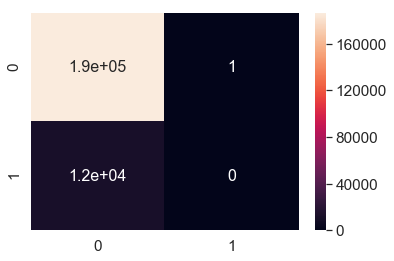

In [248]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(y_testB, y_predB), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

In [249]:
gbm.feature_importances_

array([ 0.04285714,  0.33114284,  0.35742858,  0.06028571,  0.10685714,
        0.10142857], dtype=float32)

SMOTE (Synthetic Minority Oversampling TEchnique)

In [31]:
X = inputX
y = labels

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'auto')
X_sm, y_sm = smote.fit_sample(X, y)

In [33]:
X_sm

array([[  0.00000000e+00,   4.51570000e+04,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.42880000e+04,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   5.01280000e+04,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   5.53070000e+04,   4.59894458e+00,
          1.00000000e+00,   0.00000000e+00,   6.00000000e+00],
       [  1.13380987e-01,   6.77460000e+04,   3.11338099e+00,
          1.00000000e+00,   1.00000000e+00,   1.50000000e+01],
       [  0.00000000e+00,   3.40700000e+04,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.50000000e+01]])

In [34]:
unique, counts = np.unique(y_sm, return_counts=True)

print np.asarray((unique, counts)).T

[[     0 932712]
 [     1 932712]]


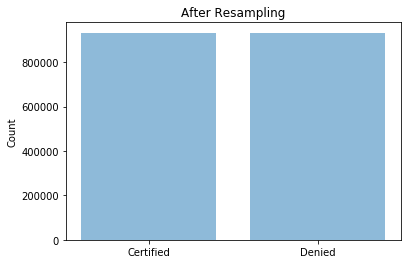

In [35]:
objects = ('Certified', 'Denied')
y_pos = np.arange(len(objects))
performance = [933082, 933082]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('After Resampling')
 
plt.show()

### LASSO FEATURE SELECTION

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_sm)
X_sm_new = scaler.transform(X_sm)

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_sm_new, y_sm)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_sm_new)

In [38]:
print(X_sm.shape)
print(X_new.shape)

(1865424L, 6L)
(1865424L, 6L)


In [39]:
X_sm[:5]

array([[  0.00000000e+00,   4.51570000e+04,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   5.42880000e+04,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00],
       [  0.00000000e+00,   5.01280000e+04,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   8.23000000e+04,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00],
       [  0.00000000e+00,   7.15100000e+04,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00]])

In [40]:
X_new[:5]

array([[-0.43466944, -0.98590234, -1.58176122,  0.23782597, -0.91645556,
        -1.42780269],
       [-0.43466944, -0.61166447, -1.58176122,  0.23782597, -0.91645556,
        -1.31673271],
       [-0.43466944, -0.78216382, -0.96278996,  0.23782597, -0.91645556,
        -1.42780269],
       [-0.43466944,  0.53641913, -0.96278996,  0.23782597, -0.91645556,
        -1.20566273],
       [-0.43466944,  0.09418644, -0.34381871,  0.23782597, -0.91645556,
        -1.09459275]])

In [41]:
X_trainA, X_testA, y_trainA, y_testA = \
                train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 42)

In [50]:
import xgboost
gbm_search = xgboost.XGBClassifier(max_depth=3)

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 100, 1000]},
              {'learning_rate': [0.01, 0.1, 0.5]}]

In [52]:
grid_search = GridSearchCV(estimator = gbm_search, param_grid = parameters, scoring='recall', cv = 3, n_jobs=-1)

In [57]:
nsamples_search = 1000
simple_random_sampling_search = np.random.randint(0, X_trainA.shape[0], nsamples)
search_sampleX = X_trainA[simple_random_sampling_search]
search_sampleY = y_trainA[simple_random_sampling_search]

In [58]:
grid_search.fit(search_sampleX,search_sampleY)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [10, 100, 1000]}, {'learning_rate': [0.01, 0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [61]:
warnings.filterwarnings("ignore")

grid_search.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [62]:
gbmA  = grid_search.best_estimator_
fit_after = gbmA.fit(X_trainA, y_trainA)

In [63]:
pred_y_after = gbmA.predict(X_testA)

In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testA, pred_y_after))

[[177715   8773]
 [ 64519 122078]]


In [72]:
confusion_matrix_A = confusion_matrix(y_testA, pred_y_after)
precision = confusion_matrix_A[1][1]/float(confusion_matrix_A[1][1] + confusion_matrix_A[0][1])
recall = confusion_matrix_A[1][1]/float(confusion_matrix_A[1][0] + confusion_matrix_A[1][1])
Specificity = confusion_matrix_A[0][0]/float(confusion_matrix_A[0][0] + confusion_matrix_A[0][1])
FPRate = confusion_matrix_A[0][1]/float(confusion_matrix_A[0][1] + confusion_matrix_A[0][0])
print("precision is %f"%precision)
print("recall is %f"%recall)
print("specificity is %f"%Specificity)
print("False Positive Rate is %f"%FPRate)
gbmA.feature_importances_

precision is 0.932954
recall is 0.654233
specificity is 0.952957
False Positive Rate is 0.047043


array([ 0.01850958,  0.27281508,  0.09946886,  0.02848865,  0.06373733,
        0.51698053], dtype=float32)

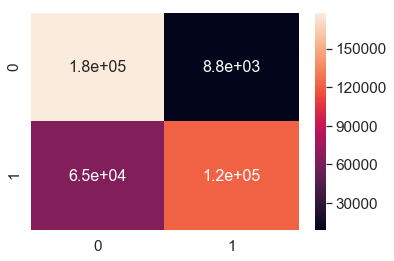

In [67]:
#plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(confusion_matrix(y_testA, pred_y_after), range(2), range(2))
sns.set(font_scale = 1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size

In [73]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


fpr, tpr, _ = roc_curve(y_testA, pred_y_after)
roc_auc = auc(fpr, tpr)

Automatically created module for IPython interactive environment


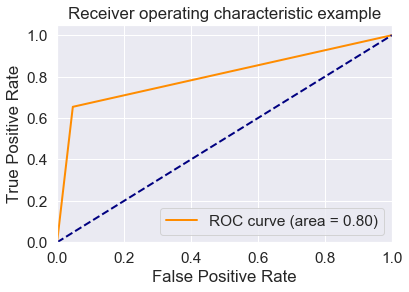

In [74]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
gbmA.feature_importances_

array([ 0.01850958,  0.27281508,  0.09946886,  0.02848865,  0.06373733,
        0.51698053], dtype=float32)